# Convolutions In Image Processing
#### By Wen Ren
#### 18.05.2018
In image processing, convolution of an image and different kinds of small matrices (or kernels) could be used for blurring, sharpening, edge detection and etc. In this notebook, I will use convolution to do these processings in an image. 

1) The first step is to convert color image into a grayscale one. 

In [1]:
import numpy as np
from scipy.signal import convolve2d
from skimage import io, color, exposure
import matplotlib.pyplot as plt

filename = 'image2.jpg'
img = io.imread(filename)
gray_img = color.rgb2gray(img)

2) To blur an image, a simple kernel could be implemented.
Here, I use convolve2d from scipy to compute convolution of a kernel and the image

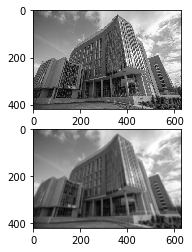

In [2]:
blurring = np.ones((7, 7)) * (1.0 / (7 * 7))
blur_img = convolve2d(gray_img, blurring, 'same')

plt.subplot(2,1,1)
plt.imshow(gray_img, cmap=plt.cm.gray)
plt.subplot(2,1,2)
plt.imshow(blur_img, cmap = plt.cm.gray)
plt.show()

3) Convolution can also be used for sharpening images.

C:\Python27\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


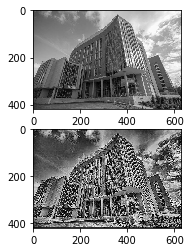

In [3]:
sharpen = np.array(([0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]))
sharpen_img = convolve2d(gray_img, sharpen, 'same')
sharpen_img = exposure.equalize_adapthist(sharpen_img/np.max(np.abs(sharpen_img)), clip_limit=0.03)

plt.subplot(2,1,1)
plt.imshow(gray_img, cmap=plt.cm.gray)
plt.subplot(2,1,2)
plt.imshow(sharpen_img, cmap = plt.cm.gray)
plt.show()

4) Another application is to detect edge in image.
Laplacian kernel is used here. 

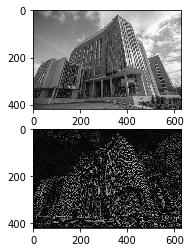

In [4]:
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]))
lap_img = convolve2d(gray_img, laplacian, 'same')
lap_img = exposure.equalize_adapthist(lap_img/np.max(np.abs(lap_img)), clip_limit=0.03)

plt.subplot(2,1,1)
plt.imshow(gray_img, cmap=plt.cm.gray)
plt.subplot(2,1,2)
plt.imshow(lap_img, cmap = plt.cm.gray)
plt.show()

5) Sobel kenel is another kind of kernel used for edge detection in image, and it can be appied in x direction or y direction

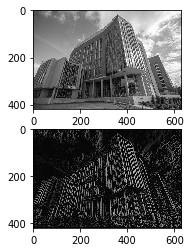

In [5]:
sobelX = np.array((
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]))
sobelX_img = convolve2d(gray_img, sobelX, 'same')
sobelX_img = exposure.equalize_adapthist(sobelX_img/np.max(np.abs(sobelX_img)), clip_limit=0.03)

plt.subplot(2,1,1)
plt.imshow(gray_img, cmap=plt.cm.gray)
plt.subplot(2,1,2)
plt.imshow(sobelX_img, cmap = plt.cm.gray)
plt.show()

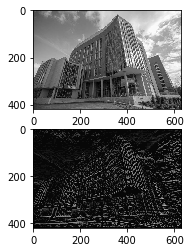

In [6]:
sobelY = np.array((
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]))
sobelY_img = convolve2d(gray_img, sobelY, 'same')
sobelY_img = exposure.equalize_adapthist(sobelY_img/np.max(np.abs(sobelY_img)), clip_limit=0.03)

plt.subplot(2,1,1)
plt.imshow(gray_img, cmap=plt.cm.gray)
plt.subplot(2,1,2)
plt.imshow(sobelY_img, cmap = plt.cm.gray)
plt.show()

6) To apply convolution to color image, a new function is defeined.
For each dimension of the color image, kernel will be convolved with it seperately. 

In [7]:
def convolve_color(img, kernel):
    ims = []
    for d in range(3):
        img_d = convolve2d(img[:,:,d], kernel, 'same')
        scale_img = exposure.equalize_hist(img_d)
        #scale_img = exposure.equalize_adapthist(img_d / np.max(np.abs(img_d)), clip_limit=0.03)
        ims.append(scale_img)

    im_conv = np.stack(ims, axis=2)


    return im_conv

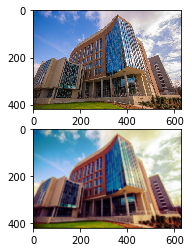

In [8]:
blur_color = convolve_color(img, blurring)

plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(blur_color)
plt.show()

7) Here is a color image after sharpening. 

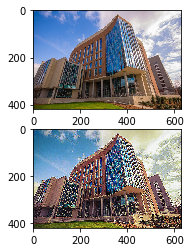

In [9]:
sharpen_color = convolve_color(img, sharpen)

plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(sharpen_color)
plt.show()